In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('AQI_Data-2019.csv')

In [3]:
data.head()

,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,main_pollution,time
0,北京市,61,14,71,3,12,0.3,61,PM10,2019-02-04 00:00:00
1,天津市,104,41,157,8,21,0.9,53,PM10,2019-02-04 00:00:00
2,石家庄市,125,36,200,12,47,0.9,30,PM10,2019-02-04 00:00:00
3,唐山市,66,42,81,22,16,1.0,52,PM10,2019-02-04 00:00:00
4,秦皇岛市,55,25,60,12,22,0.9,48,PM10,2019-02-04 00:00:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71825 entries, 0 to 71824
Data columns (total 10 columns):
city              71825 non-null object
AQI               71825 non-null object
PM2.5             71825 non-null object
PM10              71825 non-null object
SO2               71825 non-null object
NO2               71825 non-null object
CO                71825 non-null object
O3                71825 non-null object
main_pollution    71825 non-null object
time              71825 non-null object
dtypes: object(10)
memory usage: 5.5+ MB


In [5]:
data['time'].unique()

array(['2019-02-04 00:00:00', '2019-02-04 01:00:00', '2019-02-04 02:00:00',
       '2019-02-04 03:00:00', '2019-02-04 04:00:00', '2019-02-04 05:00:00',
       '2019-02-04 06:00:00', '2019-02-04 07:00:00', '2019-02-04 08:00:00',
       '2019-02-04 09:00:00', '2019-02-04 10:00:00', '2019-02-04 11:00:00',
       '2019-02-04 12:00:00', '2019-02-04 13:00:00', '2019-02-04 14:00:00',
       '2019-02-04 15:00:00', '2019-02-04 16:00:00', '2019-02-04 17:00:00',
       '2019-02-04 18:00:00', '2019-02-04 19:00:00', '2019-02-04 20:00:00',
       '2019-02-04 21:00:00', '2019-02-04 22:00:00', '2019-02-04 23:00:00',
       '2019-02-05 00:00:00', '2019-02-05 01:00:00', '2019-02-05 02:00:00',
       '2019-02-05 03:00:00', '2019-02-05 04:00:00', '2019-02-05 05:00:00',
       '2019-02-05 06:00:00', '2019-02-05 07:00:00', '2019-02-05 08:00:00',
       '2019-02-05 09:00:00', '2019-02-05 10:00:00', '2019-02-05 11:00:00',
       '2019-02-05 12:00:00', '2019-02-05 13:00:00', '2019-02-05 14:00:00',
       '2019

In [6]:
# 数据清洗
data['time'] = pd.to_datetime(data['time'])
data = data[data['time']<=pd.to_datetime('2019-02-11 23:59:59')]  # 选取2月4日——2月12日的数据
data.set_index(data["time"], inplace=True)
data = data.replace('—', np.nan)
for col in ['AQI', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    data[col] = data[col].astype(float)
data.head()

,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,main_pollution,time
time,,,,,,,,,,
2019-02-04,北京市,61.0,14.0,71.0,3.0,12.0,0.3,61.0,PM10,2019-02-04
2019-02-04,天津市,104.0,41.0,157.0,8.0,21.0,0.9,53.0,PM10,2019-02-04
2019-02-04,石家庄市,125.0,36.0,200.0,12.0,47.0,0.9,30.0,PM10,2019-02-04
2019-02-04,唐山市,66.0,42.0,81.0,22.0,16.0,1.0,52.0,PM10,2019-02-04
2019-02-04,秦皇岛市,55.0,25.0,60.0,12.0,22.0,0.9,48.0,PM10,2019-02-04


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68155 entries, 2019-02-04 00:00:00 to 2019-02-11 23:00:00
Data columns (total 10 columns):
city              68155 non-null object
AQI               67903 non-null float64
PM2.5             67815 non-null float64
PM10              66437 non-null float64
SO2               67832 non-null float64
NO2               67852 non-null float64
CO                67838 non-null float64
O3                67842 non-null float64
main_pollution    41176 non-null object
time              68155 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 5.7+ MB


In [8]:
len(data['city'].unique())

367

In [9]:
data.to_csv('data_clean.csv', index=False)

#### 一、数据详情
- 共有68155条数据，时间为2月4日到2月11日，每隔1小时收集一次，囊括全国367个城市
- 包含字段：城市、空气质量指数、PM2.5指数、PM10指数、SO2指数、NO2指数、CO指数、O3指数、主要污染源、时间

#### 二、问题
1. 燃放烟花爆竹真的对空气质量有影响吗？
2. 烟花爆竹对空气质量的影响体现在哪些指标上？
3. 烟花爆竹对空气质量的污染程度有多大？
4. 哪些区域污染最严重(轻)？
5. 哪些城市属于一秒破功型？
6. 除夕中午到初一中午的超标城市个数
7. 除夕到初七的超标城市个数


##### 1. 燃放烟花爆竹真的对空气质量有影响吗？

In [10]:
AQI_total_mean = data[data['time']<=pd.to_datetime('2019-02-06 23:59:59')].groupby(['time'])['AQI'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


"全国春节期间空气质量指数总体趋势", 

"2019年除夕到初二"

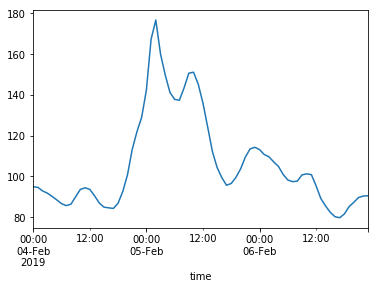

In [12]:
AQI_total_mean.plot()

In [ ]:
"各大城市春节期间空气质量指数", "2019年除夕到初二"

In [15]:
def city_AQI(data, cities):
    for city in cities:
        city_aqi = data[(data['city']==city)&(data['time']<=pd.to_datetime('2019-02-06 23:59:59'))]
        city_aqi.plot()

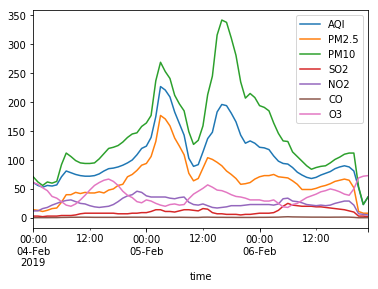

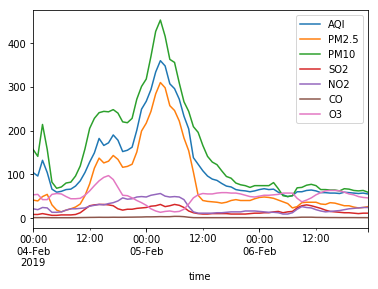

In [16]:
city_AQI(data=data, cities=['北京市', '天津市'])

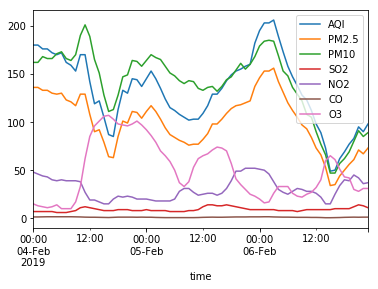

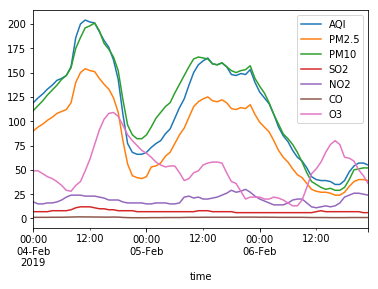

In [17]:
city_AQI(data=data, cities=['南京市', '杭州市'])

##### 2. 烟花爆竹对空气质量的影响体现在哪些指标上？

In [18]:
data_total_idx = data[data['time']<=pd.to_datetime('2019-02-06 23:59:59')].groupby(['time']).mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [19]:
data_total_idx.columns

Index(['AQI', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], dtype='object')

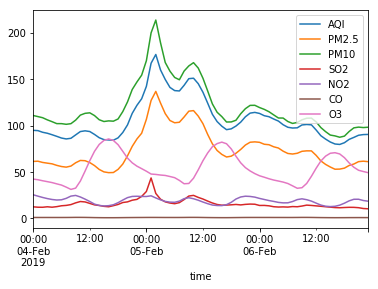

In [27]:
# "全国春节期间空气质量各指标（2019年除夕到初二）", "单位:μg/m3(CO为mg/m3)", 
data_total_idx.plot()

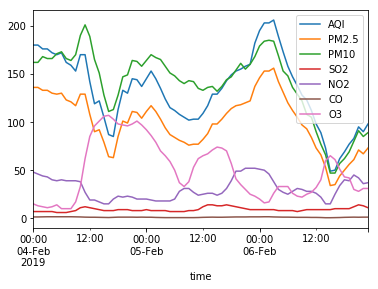

In [26]:
nanjing_idx = data[(data['city']=='南京市')&(data['time']<=pd.to_datetime('2019-02-06 23:59:59'))]
#"南京市春节期间空气质量各指标（2019年除夕到初二）", "单位:μg/m3(CO为mg/m3)"
nanjing_idx.plot()

In [28]:
main_pol = data.loc[data['time']==pd.to_datetime('2019-02-05 02:00:00'), 'main_pollution'].value_counts()

In [29]:
main_pol

PM2.5         243
PM10           97
PM10,PM2.5     10
Name: main_pollution, dtype: int64

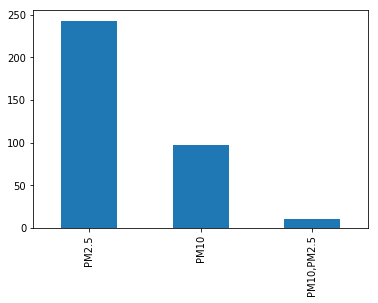

In [30]:
# "全国城市首要污染物", "2019年2月5日凌晨2点
main_pol.plot.bar()

##### 3. 烟花爆竹对空气质量的污染程度有多大？

In [31]:
data2 = data[data['time']<=pd.to_datetime('2019-02-05 23:59:59')]
data_AQI_min = data2.groupby('city')['AQI'].min()
data_AQI_max = data2.groupby('city')['AQI'].max()

In [32]:
data_AQI_times = np.round(data_AQI_max/data_AQI_min, 1)

In [34]:
data_AQI_times_top10 = data_AQI_times.nlargest(10)

In [38]:
data_AQI_times_top10

city
伊春市       22.7
鸡西市       22.7
锡林郭勒盟     21.4
大兴安岭地区    20.4
玉树州       19.2
盘锦市       17.9
葫芦岛市      17.2
甘南州       16.7
瓦房店市      16.1
锦州市       16.1
Name: AQI, dtype: float64

In [36]:

import pylab as mpl     #import matplotlib as mpl
 
#设置汉字格式
# sans-serif就是无衬线字体，是一种通用字体族。
# 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica,SimHei 中文的幼圆、隶书等等
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False 


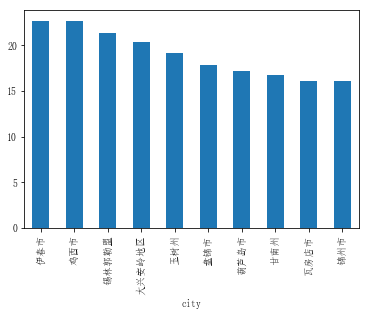

In [37]:
# ("全国除夕和春节期间空气质量最高最低比Top10城市", "时间：2019年除夕至初一
data_AQI_times_top10.plot.bar()

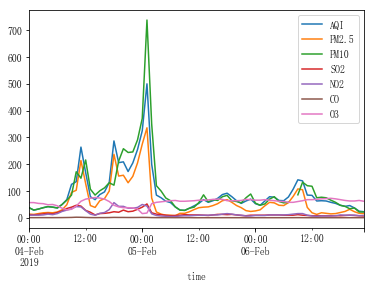

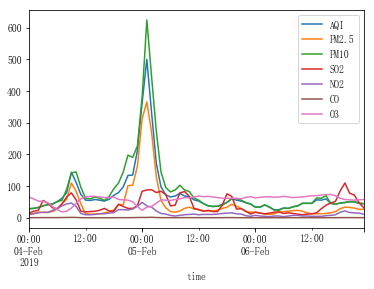

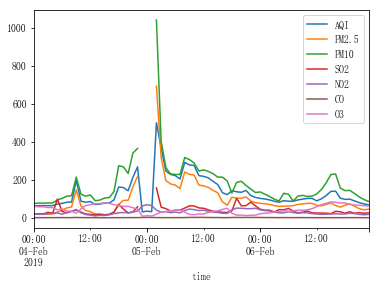

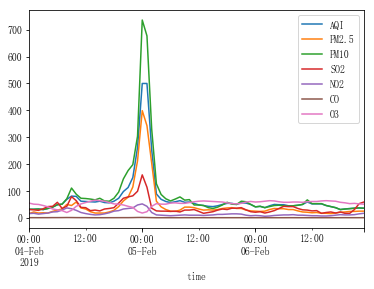

In [39]:
city_AQI(data=data, cities=['盘锦市','葫芦岛市','瓦房店市','锦州市'])

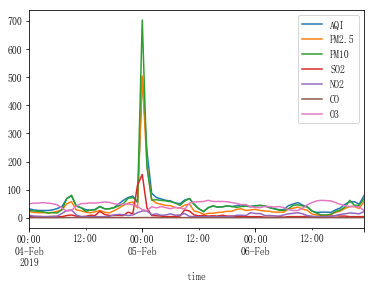

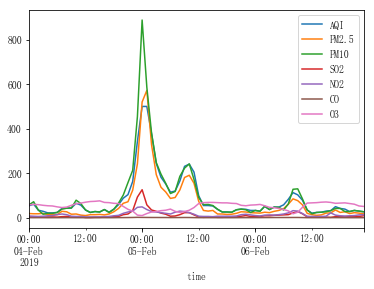

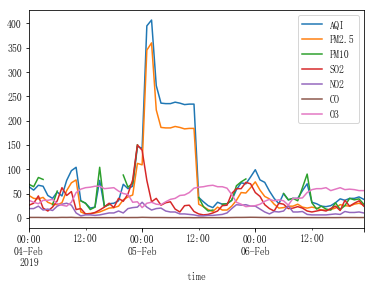

In [40]:
city_AQI(data=data, cities=['伊春市','鸡西市', '大兴安岭地区'])

In [41]:
data_AQI_times_counts = data_AQI_times.value_counts(bins=[1,5,10,15,20,25])
data_AQI_times_counts

(0.999, 5.0]    238
(5.0, 10.0]      88
(10.0, 15.0]     28
(15.0, 20.0]      9
(20.0, 25.0]      4
Name: AQI, dtype: int64

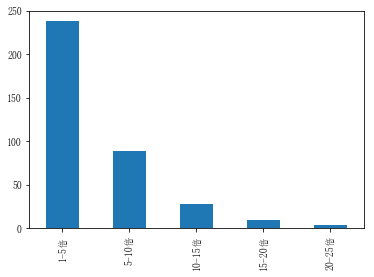

In [43]:
#"全国除夕和春节期间空气质量最高最低比的城市数量", "时间：2019年除夕至初一"
idxs = ['1-5倍','5-10倍','10-15倍','15-20倍','20-25倍']
data_AQI_times_counts.index = idxs
data_AQI_times_counts.plot.bar()

##### 4. 哪些区域污染最严重（轻）？

In [44]:
start_time = pd.to_datetime('2019-02-04 20:00:00')
end_time = pd.to_datetime('2019-02-05 04:00:00')
AQI_by_city = data[(data['time']>=start_time)&(data['time']<=end_time)].groupby('city')['AQI'].mean()

In [45]:
AQI_by_city.nlargest(10)  # 选出最严重的10个

city
阿克苏地区    454.333333
库尔勒市     436.111111
呼和浩特市    394.333333
和田地区     357.666667
安康市      343.888889
白山市      340.333333
亳州市      320.333333
喀什地区     320.111111
包头市      295.666667
咸阳市      288.222222
Name: AQI, dtype: float64

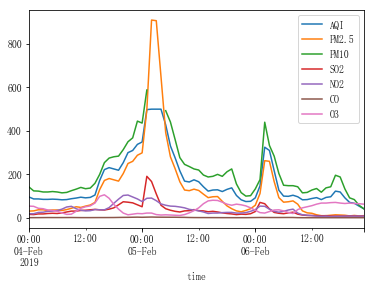

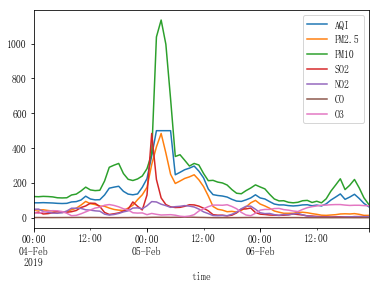

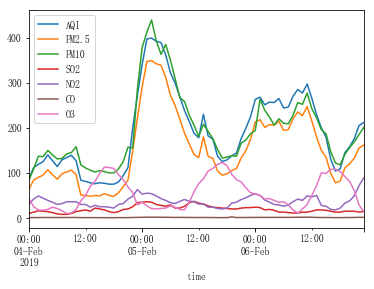

In [46]:
city_AQI(data=data, cities=['呼和浩特市', '包头市', '咸阳市'])

In [47]:
AQI_by_city.nsmallest(5)

city
义乌市      12.500000
阿勒泰地区    27.111111
攀枝花市     27.444444
丽江市      28.000000
阿里地区     28.222222
Name: AQI, dtype: float64

In [48]:
AQI_by_city[AQI_by_city<=50]

city
中山市      41.555556
丽江市      28.000000
义乌市      12.500000
保山市      42.888889
嘉峪关市     34.888889
塔城地区     33.666667
大理州      41.444444
安顺市      39.333333
惠州市      47.333333
拉萨市      36.777778
揭阳市      45.222222
攀枝花市     27.444444
昆明市      48.666667
景德镇市     43.444444
林芝市      36.333333
武威市      47.777778
汕尾市      49.555556
江门市      42.555556
海北州      39.111111
海南州      44.333333
海口市      41.333333
海西州      46.333333
深圳市      44.777778
珠海市      48.777778
甘孜州      43.555556
迪庆州      39.111111
那曲地区     41.333333
金昌市      49.000000
阳江市      38.444444
阿勒泰地区    27.111111
阿坝州      41.222222
阿里地区     28.222222
Name: AQI, dtype: float64

##### 5. 哪些城市属于一秒破功型？

In [49]:
city1 = data.loc[(data['time'] == pd.to_datetime('2019-02-05 02:00:00'))&(data['AQI']<100), 'city']

In [50]:
data3 = data[(data['time'] >= pd.to_datetime('2019-02-05 18:00:00'))&
            (data['time'] <= pd.to_datetime('2019-02-06 23:59:59'))]

In [51]:
city2 = data3.loc[data3['AQI']>200, 'city']

In [52]:
list(set(city1).intersection(set(city2)))

['中卫市', '白城市', '铜川市', '长春市', '晋城市', '郑州市', '忻州市', '吴忠市', '那曲地区']

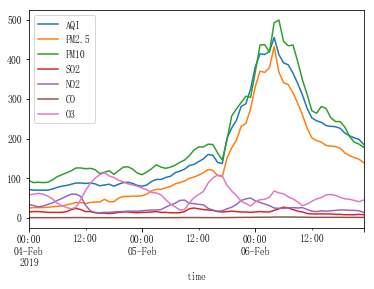

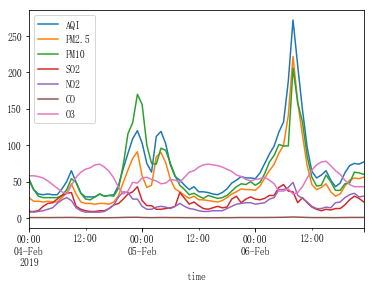

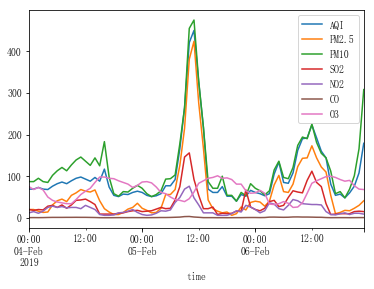

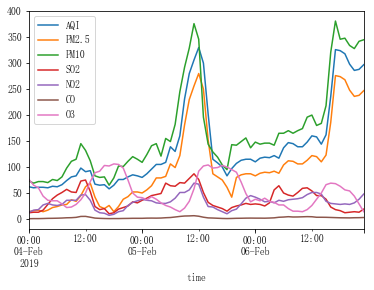

In [53]:
city_AQI(data=data, cities=['郑州市', '长春市', '忻州市', '晋城市'])

##### 6. 除夕中午到初一中午的超标城市个数

In [54]:
start_time = pd.to_datetime('2019-02-04 12:00:00')
end_time = pd.to_datetime('2019-02-05 12:00:00')

In [55]:
city_over_new_year = data.loc[(data['time']>=start_time)&(data['time']<=end_time)&(data['AQI']>100)].groupby('time')['AQI'].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


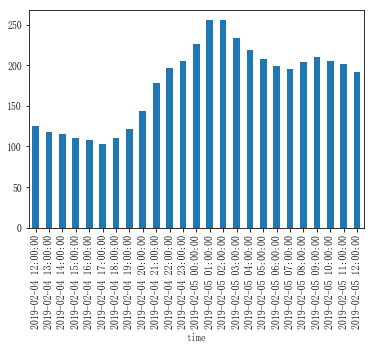

In [57]:
city_over_new_year.plot.bar()

##### 7. 除夕到初七的超标城市个数

In [58]:
city_over_count = (data.groupby('city')['AQI'].resample('D').mean()>100).unstack(level=-1).sum()
city_over_count

time
2019-02-04    131
2019-02-05    209
2019-02-06    130
2019-02-07     75
2019-02-08     23
2019-02-09     26
2019-02-10     27
2019-02-11     83
Freq: D, dtype: int64

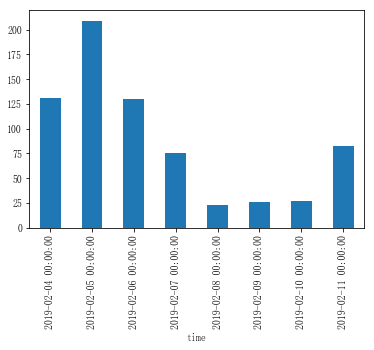

In [59]:
#"全国除夕至初七期间空气质量超标城市数量", "时间: 2019年  总城市数: 367",
date = ['02-04(除夕)','02-05(初一)','02-06(初二)','02-07(初三)',
        '02-08(初四)','02-09(初五)','02-10(初六)','02-11(初七)']

city_over_count.plot.bar()